# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
path='/home/akshit/Documents/M.Sc./GRB/data/fermi202.xlsx'

In [3]:
data=pd.read_excel(path)

In [4]:
data.head(3)

,name,t90,t50,pflx_plaw_index,pflx_plaw_phtflux,pflx_comp_epeak,pflx_comp_index
0,GRB080714086,5.376,2.816,-1.355209,1.921076,683.2227,-0.727978
1,GRB080714425,40.192,11.776,NaN,NaN,NaN,NaN
2,GRB080714745,59.649,25.088,-1.571910,6.959844,298.8300,-0.832917


In [5]:
X=np.log(data['t90'])

In [6]:
N = np.arange(1, 11)
models = [None for i in range(len(N))]
X=X.values.reshape(-1,1)

# Gaussian MIxture Model

Minimum BIC will give Optimal Number of cluster

In [7]:
for i in range(len(N)):
    models[i] = GaussianMixture(N[i], init_params='kmeans').fit(X)

# compute the AIC and the BIC

AIC1 = [m.aic(X) for m in models]
BIC1 = [m.bic(X) for m in models]

In [8]:
index = BIC1.index(min(BIC1))
index= index
print("Index where BIC is minimum:", index)

# Calculate differences between consecutive BIC values

differences = [BIC1[i + 1] - BIC1[i] for i in range(len(BIC1) - 1)]
print("Differences between consecutive BIC values:", differences)

Index where BIC is minimum: 1
Differences between consecutive BIC values: [-700.8483999342043, 35.78179195587836, 34.9001496824294, 21.551038222234638, 23.60322176752743, 20.83180248827921, 22.20174546837734, 26.814033632421342, 13.292171781955403]


In [9]:
M_best = models[index]

x = np.linspace(-4, 6.2, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]


[[ 3.36212328]
 [-0.02263908]]
[[[1.01918311]]

 [[1.38351212]]]


/tmp/ipykernel_51408/3958990081.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, pdf_individual, '--k',color="red")


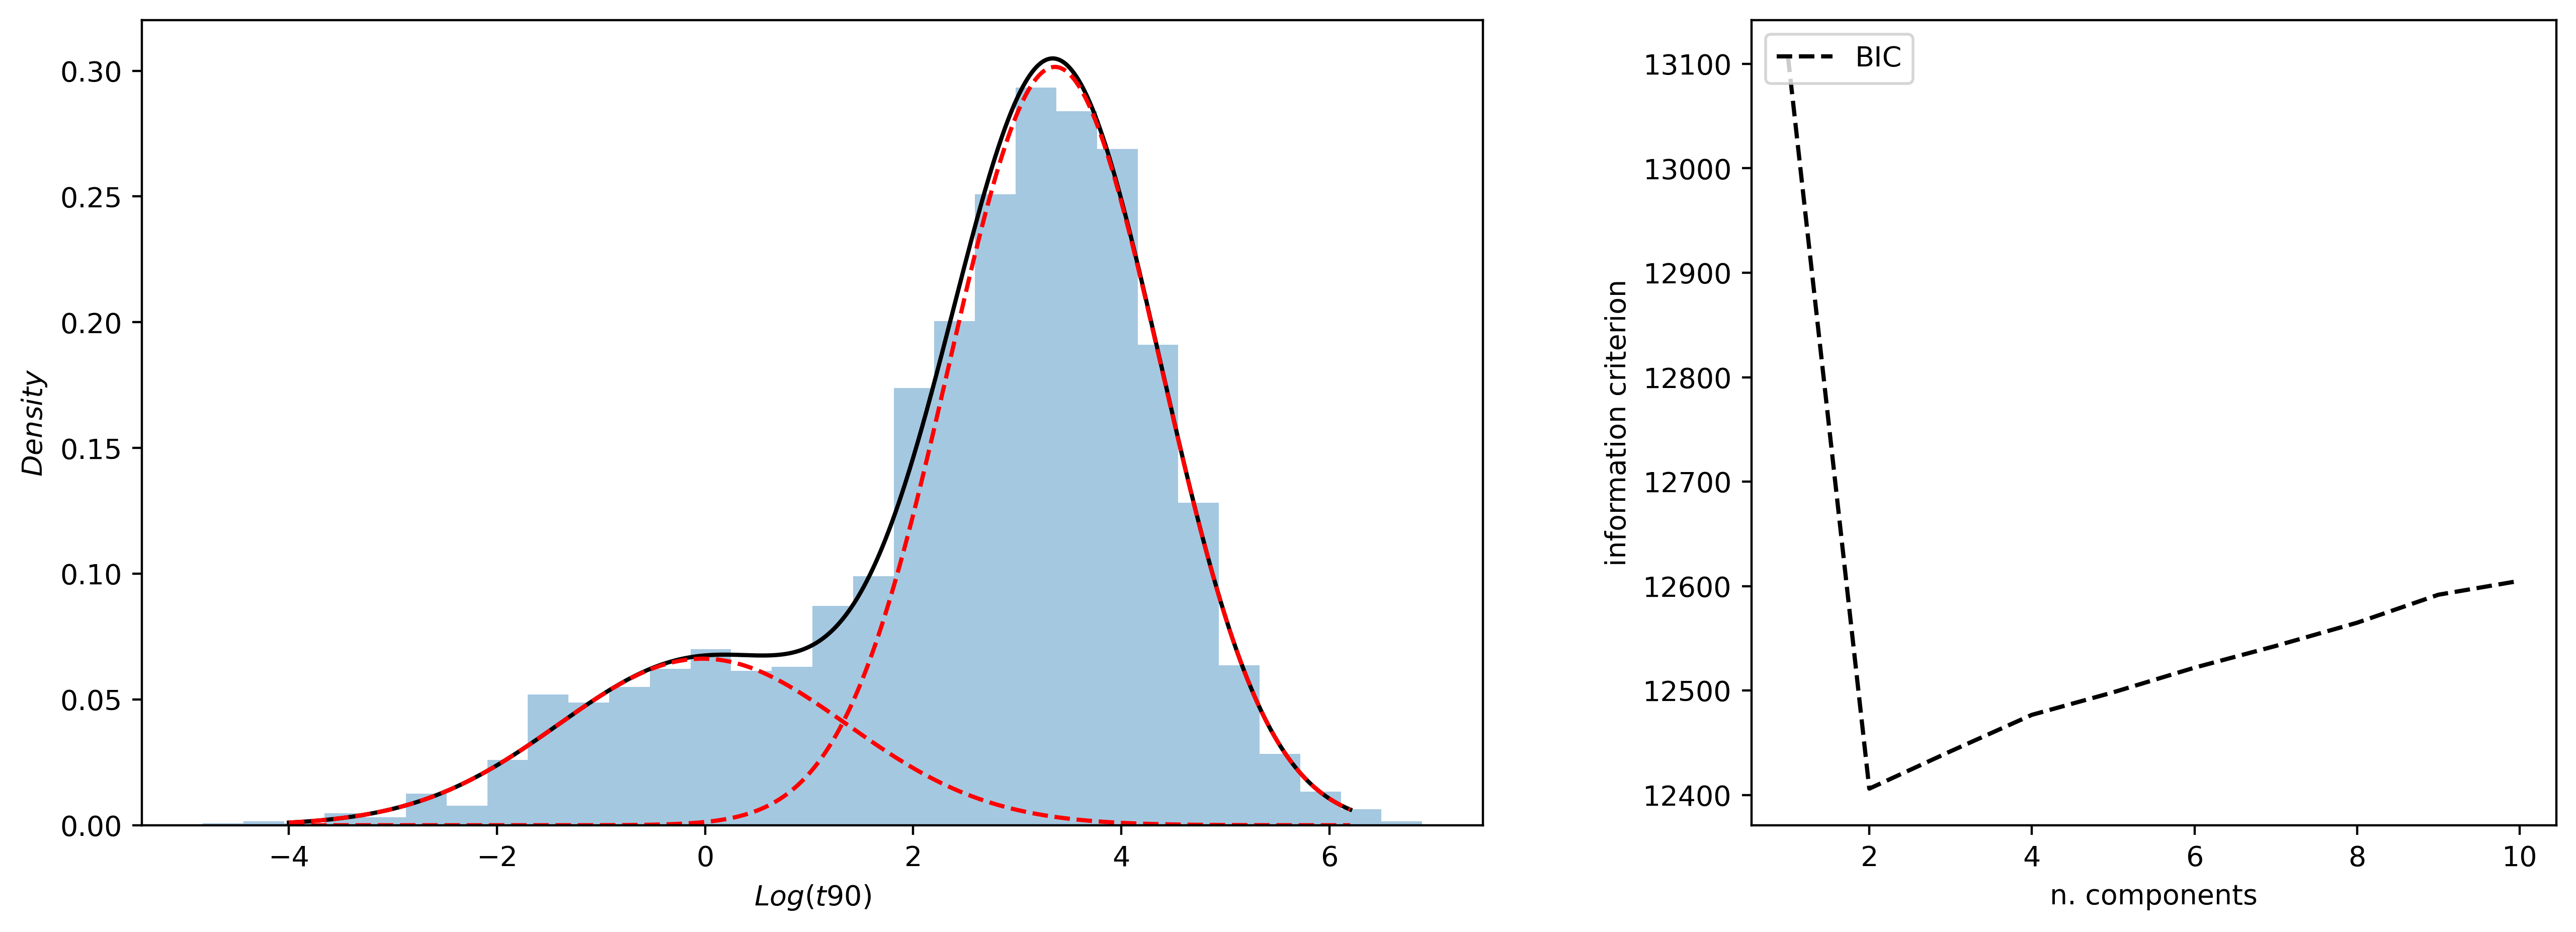

In [10]:
fig = plt.figure(figsize=(5, 5),dpi=400)
fig.subplots_adjust(left=2, right=6,bottom=0.7, top=1.5, wspace=1)
ax = fig.add_subplot(121)

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k',color="red")

ax.set_xlabel('$Log(t90)$')
ax.set_ylabel('$Density$')


ax = fig.add_subplot(132)
ax.plot(N, BIC1, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)
print(M_best.means_)
print(np.sqrt(M_best.covariances_))